# Insurance Claims Fraud Detection

# Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# Importing Necessary libraries

In [2]:
# Importing Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'E:\sheeba working\insurance claim@.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,6/9/2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,5/1/2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


So here we have 1000 rows and 40 columns in data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
# droping _c39 column so dropping it.
df.drop('_c39',axis=1,inplace=True)

In [8]:
df.shape

(1000, 39)

In [9]:
# printing all data type  and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')

1/1/2006      3
28-04-1992    3
5/8/1992      3
14-12-1991    2
9/8/2004      2
             ..
3/6/2014      1
12/12/1998    1
18-02-1999    1
30-10-1997    1
11/11/1996    1
Name: policy_bind_date, Length: 951, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales             

From Dataset we have more ? question mark sign-so replacing sign with No info

In [10]:
# replacing '?' with No Info
df=df.replace('?','No Info')

In [11]:
# printing all data type  and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(df[column].value_counts())
        print('@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')

1/1/2006      3
28-04-1992    3
5/8/1992      3
14-12-1991    2
9/8/2004      2
             ..
3/6/2014      1
12/12/1998    1
18-02-1999    1
30-10-1997    1
11/11/1996    1
Name: policy_bind_date, Length: 951, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec

# Description of Dataset

In [12]:
# statisticla summary of numerical columns
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Observations:
   
    1)There is no missing values in the dataset
    
    2)Most of the  columns as greater than the median values so the datas are skewed to right 
    
    3)some of the columns have the less mean value,so the data are skewed to left.
    
    4)We  can observe that there must be lot of difference between 75% and max in most of the columns
    
    5)We can observe that the standarad deviation is minimum of 25% percentaile value.

In [13]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

Here we have one row as a negative value so we dropping the row.

In [14]:
df.loc[df['umbrella_limit']== -1000000]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
290,284,42,526039,4/5/1995,OH,100/300,500,1338.54,-1000000,438178,...,1,No Info,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


In [15]:
# droping that value row(one row only)
df.drop(df[df['umbrella_limit']== -1000000].index,inplace=True)

In [16]:
# dividing ['incident_data'] into three other columns
df['incident_Date']=df['incident_date'].str.split('-').str[0]
df['incident_Month']=df['incident_date'].str.split('-').str[1]
df['incident_Year']=df['incident_date'].str.split('-').str[2]

In [17]:
# in incident data all the incident is from 2015 so droping the incident_year
df['incident_Year'].value_counts()
df.drop('incident_Year',axis=1,inplace=True)

In [18]:
# dividing policy_bind_date into three other columns
df['policy_bind_Date']=df['policy_bind_date'].str.split('-').str[0]
df['policy_bind_Month']=df['policy_bind_date'].str.split('-').str[1]
df['policy_bind_Year']=df['policy_bind_date'].str.split('-').str[2]

# droping policy_bind_date column
df.drop('policy_bind_date',axis=1,inplace=True)

In [19]:
df.head()


,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,23100,Dodge,RAM,2007,N,22,02,6/9/2000,NaN,NaN
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,50720,Chevrolet,Tahoe,2014,Y,10/1/2015,NaN,25,05,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,4550,Accura,RSX,2009,N,17,02,6/6/2014,NaN,NaN


In [20]:
# droping the policy_number and other useless columns as well
df.drop(['policy_number','insured_zip','incident_location'],axis=1,inplace=True)

In [21]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,23100,Dodge,RAM,2007,N,22,02,6/9/2000,NaN,NaN
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,50720,Chevrolet,Tahoe,2014,Y,10/1/2015,NaN,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,4550,Accura,RSX,2009,N,17,02,6/6/2014,NaN,NaN


In [22]:
df.shape

(999, 40)

In [23]:
df['fraud_reported'].value_counts()

N    752
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

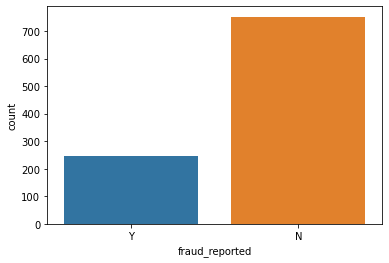

In [24]:
sns.countplot(df['fraud_reported'])

# Exploratory Data Analysis

In [25]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,23100,Dodge,RAM,2007,N,22,02,6/9/2000,NaN,NaN
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,50720,Chevrolet,Tahoe,2014,Y,10/1/2015,NaN,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,4550,Accura,RSX,2009,N,17,02,6/6/2014,NaN,NaN


<AxesSubplot:>

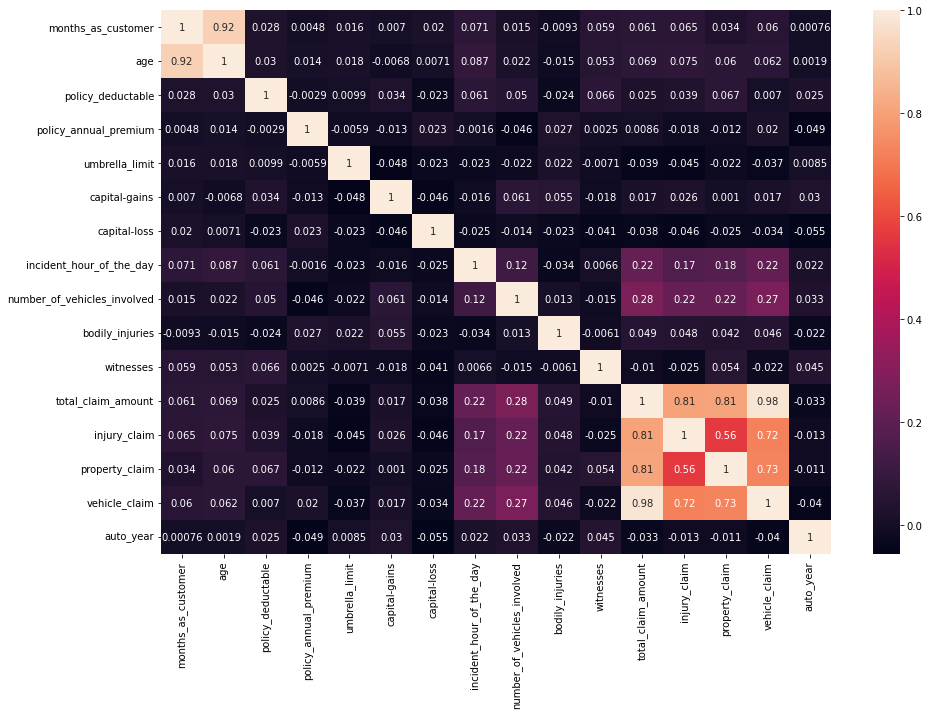

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

From this heatmap,total_claim_amount,injury_claim, property_claim and vehicle_claim are highly correlated with each other and the remaining columns are very less correlated with each other.

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

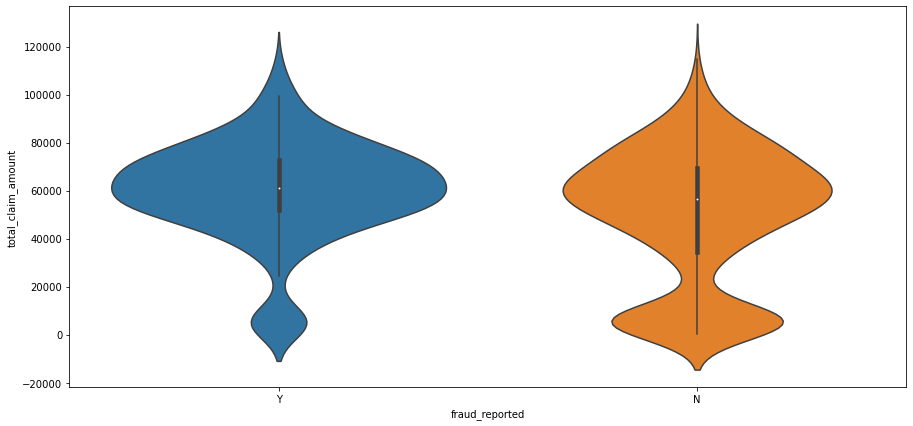

In [32]:
plt.figure(figsize=(15,7))
sns.violinplot(y='total_claim_amount',x='fraud_reported',data=df)

Based on the total claim amount around(50000-70000) were most of frauds are reported

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

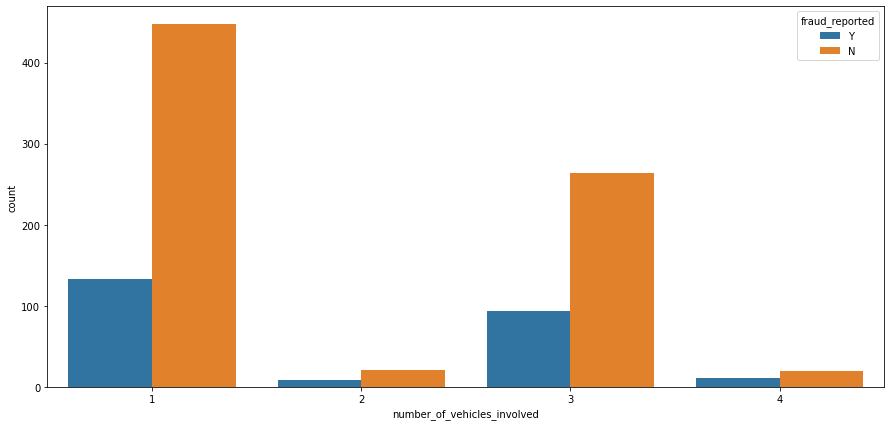

In [33]:
plt.figure(figsize=(15,7))
sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='incident_city', ylabel='count'>

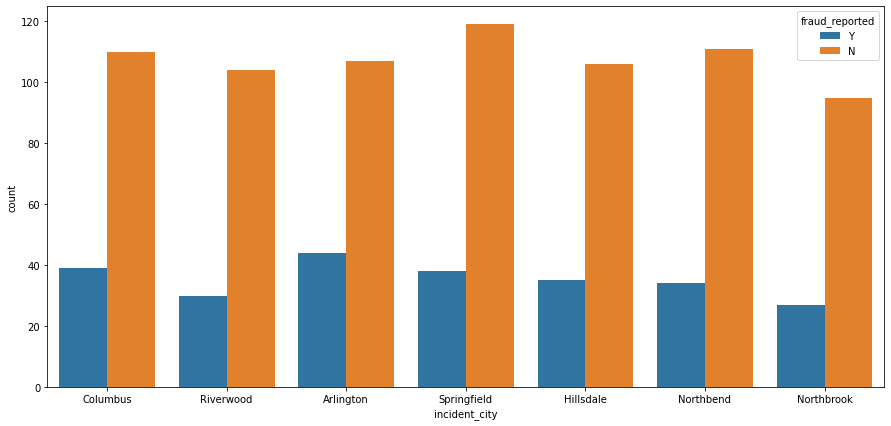

In [34]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_city',hue='fraud_reported',data=df)

Almost in all areas fraud reported counts are same

<AxesSubplot:xlabel='incident_state', ylabel='count'>

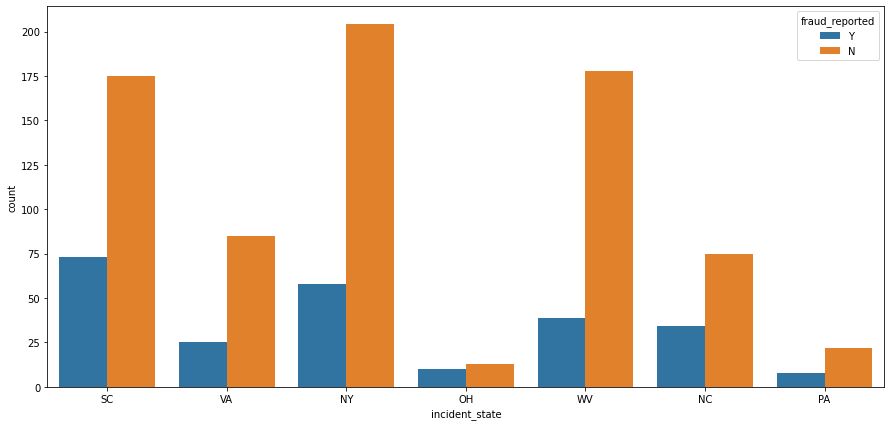

In [35]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_state',hue='fraud_reported',data=df)

SC,NY,OH,NC,PA -most of the fraud reports are recorded 

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

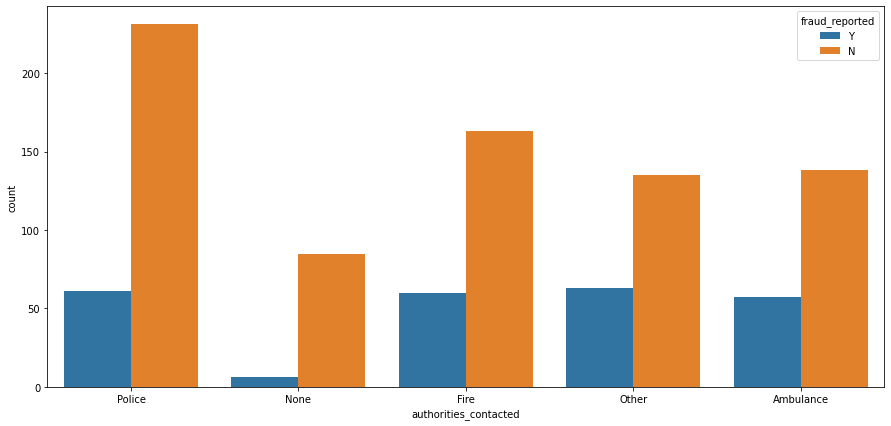

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)

 More number of fraud report recorded in CX  have contacted authorities_contacted of Fire,other and Ambulance

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

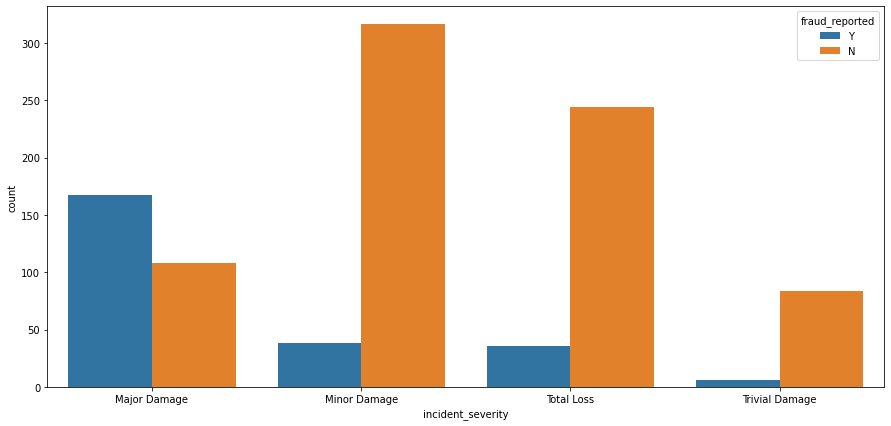

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)

Most of the fraud reported claim are major damage,most of them are counted as fraud,more no. of fraud report recorded against in trivial damage

<AxesSubplot:xlabel='collision_type', ylabel='count'>

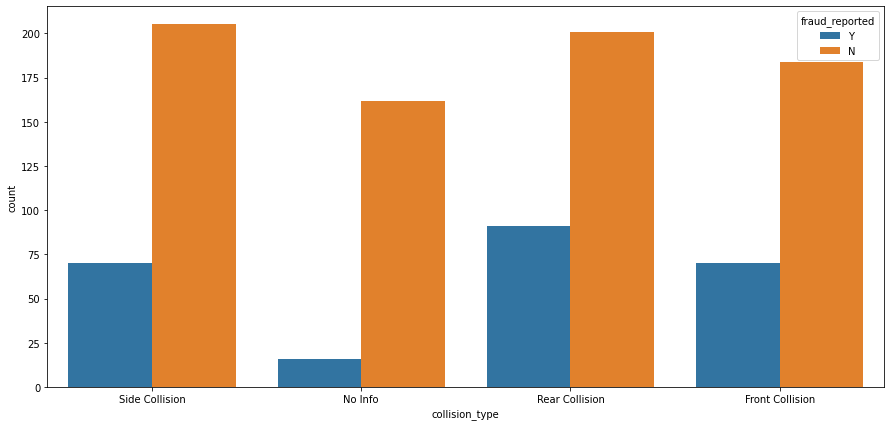

In [38]:
plt.figure(figsize=(15,7))
sns.countplot(x='collision_type',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='incident_type', ylabel='count'>

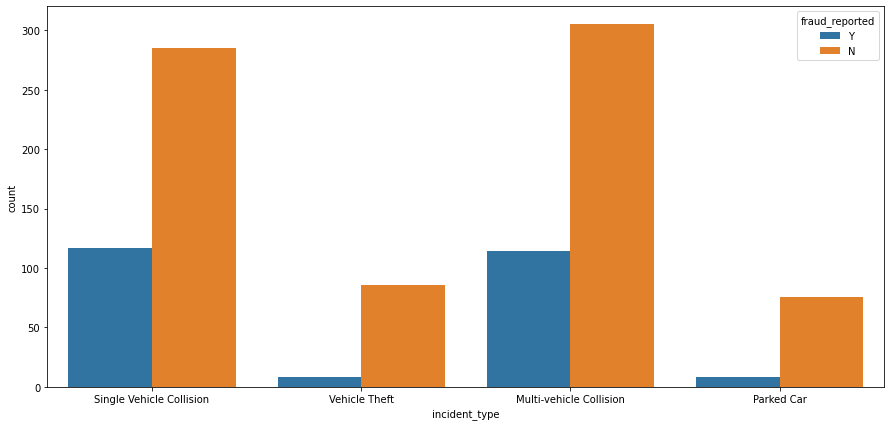

In [39]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_type',hue='fraud_reported',data=df)

Most of the claim reported and fraud reported in single vehicle collision and multi-vehicle collision incident type

<AxesSubplot:xlabel='incident_Month', ylabel='count'>

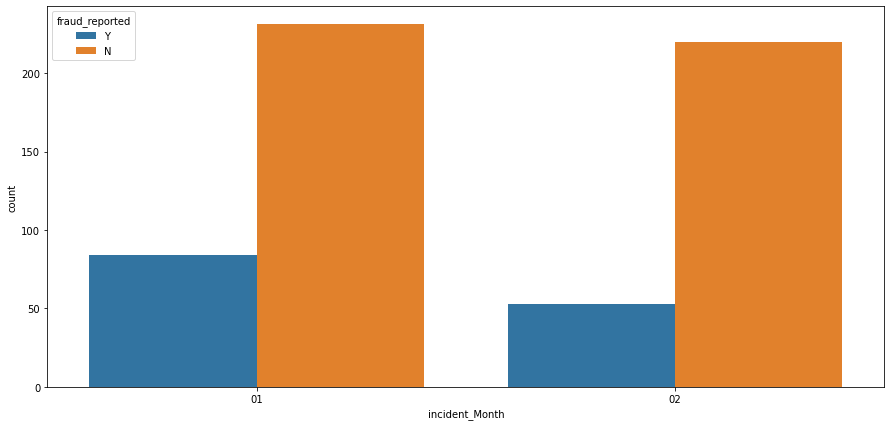

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_Month',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

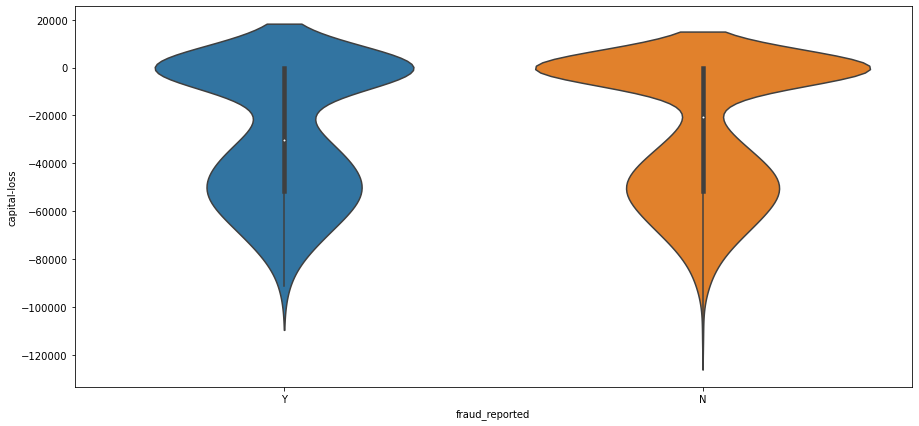

In [43]:
plt.figure(figsize=(15,7))
sns.violinplot(y='capital-loss',x='fraud_reported',data=df)

Most of fraud reported we see in CX those capital loss are -40000 to -60000

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-gains'>

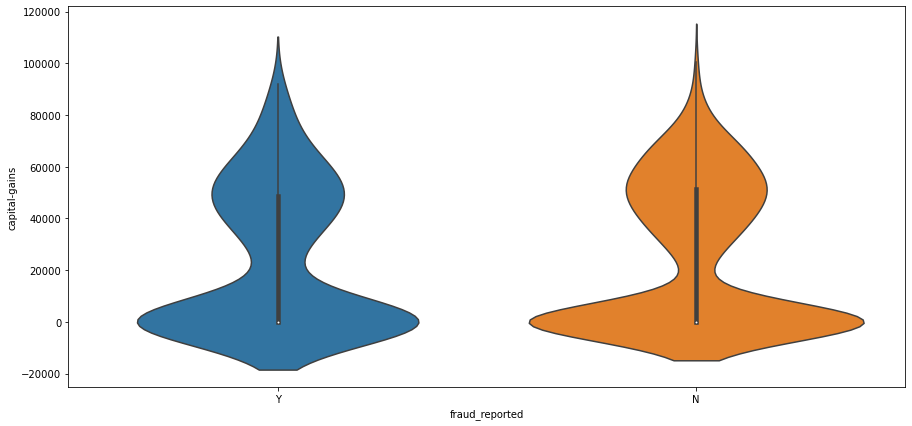

In [44]:
plt.figure(figsize=(15,7))
sns.violinplot(y='capital-gains',x='fraud_reported',data=df)

Most of the fraud reports recorded in CX capital gains are 0 -50000

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

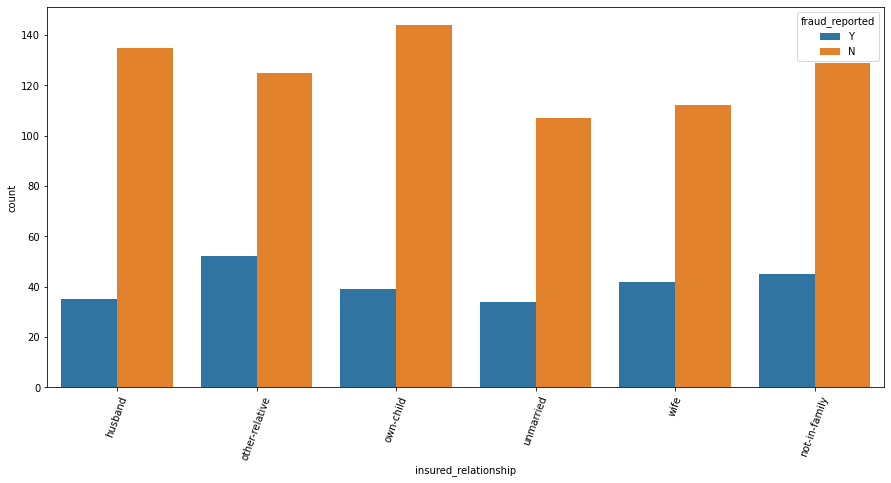

In [45]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

From the graph,we observe that ,CX having insured relationship with other relative and wife are most reported than others.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

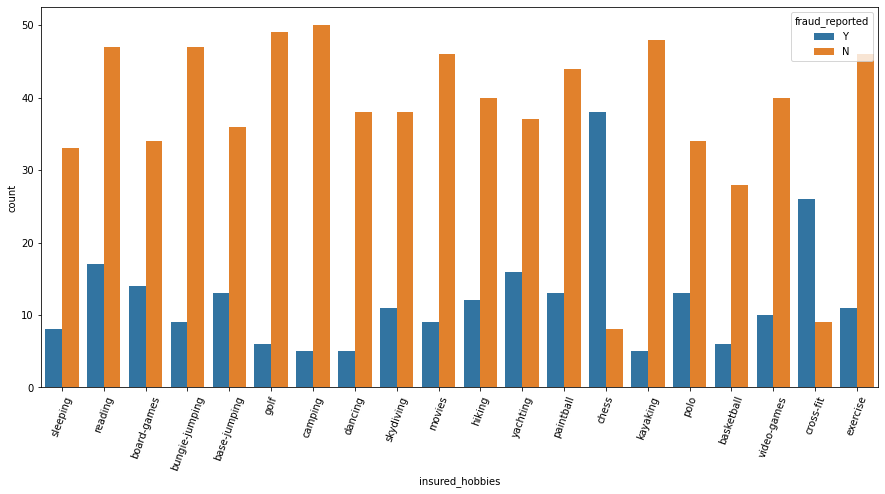

In [46]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

Observations:
    
    1)cx hobbies are crossfitted to almost fraud reportedin cx
    
    2)After that cx hobbies are board games,reading,yetching,paintball,polo and base jumping as the most of fraud report in cx than others

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

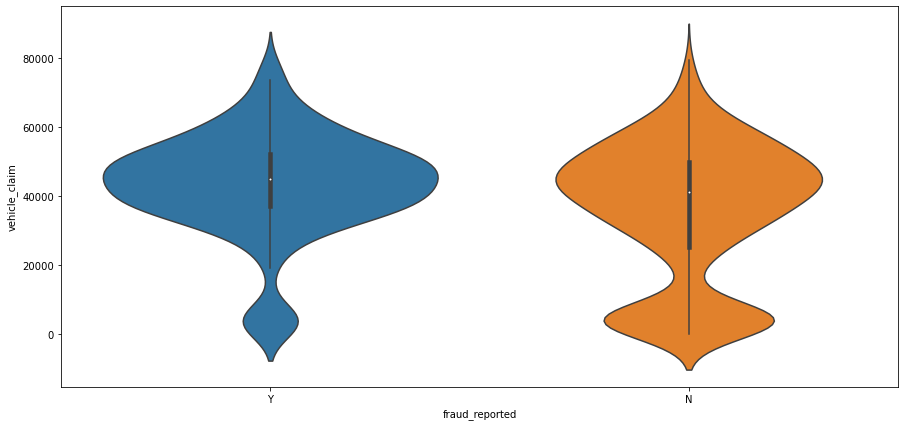

In [48]:
plt.figure(figsize=(15,7))
sns.violinplot(y='vehicle_claim',x='fraud_reported',data=df)


Observations:
    vehicle claim:cx are between(1000-6500)
    fraud_report:Higher in cx are between(3000-6000)

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

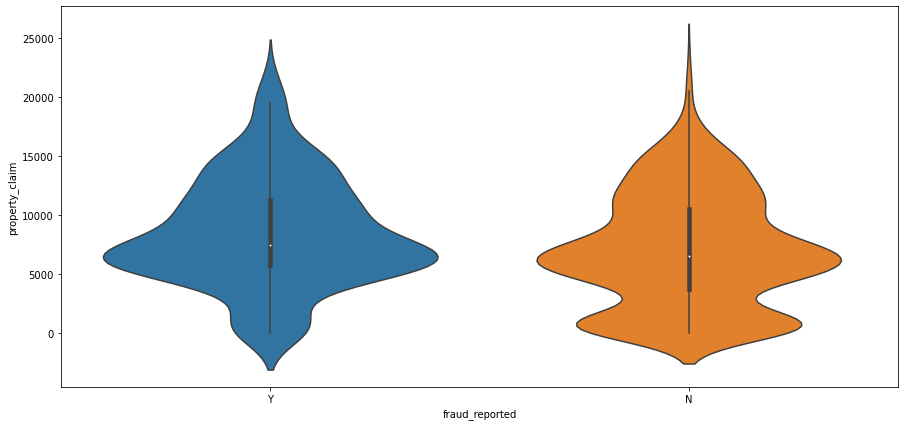

In [49]:
plt.figure(figsize=(15,7))
sns.violinplot(y='property_claim',x='fraud_reported',data=df)

from the plot we get that the cx is claimed at (5000-8000)

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

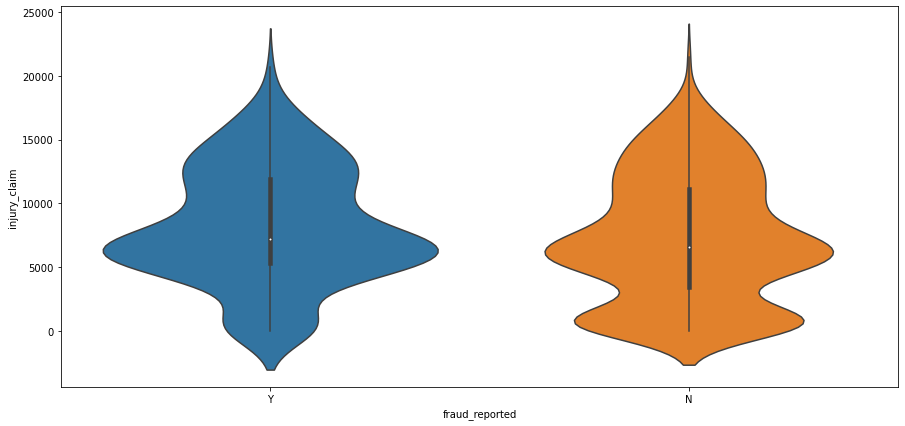

In [50]:
plt.figure(figsize=(15,7))
sns.violinplot(y='injury_claim',x='fraud_reported',data=df)

Observations:fraud reported in cx between(5000-8000)and cx injury claim at(1000-15000)

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

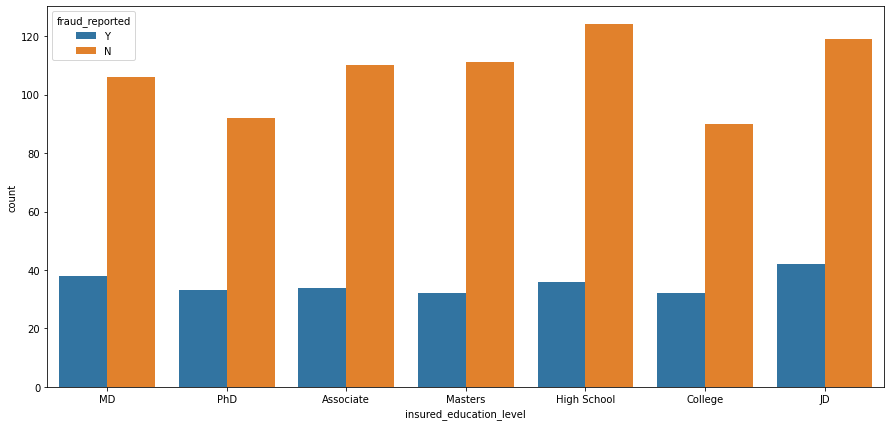

In [52]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df)

Observations:
    
    1)From the plot, we know that the cx is higher in education level in high school and least in phD and college
    
    2)In froud report varies in JD,phD and colleges and little difference in all kind of reports
    

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

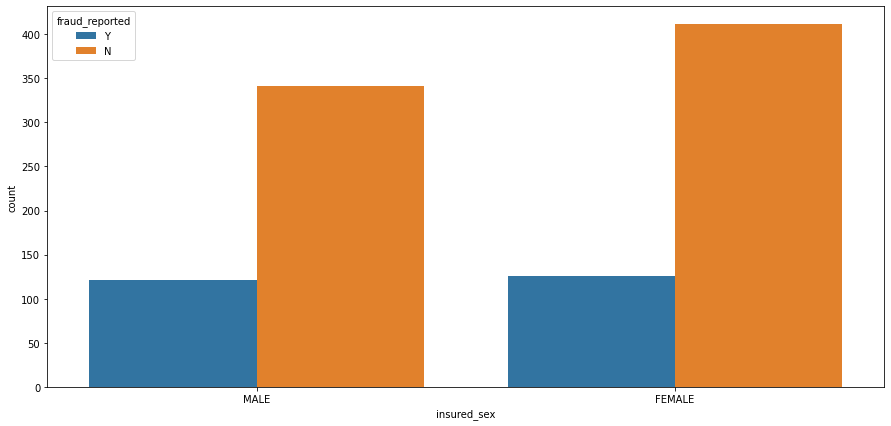

In [53]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_sex',hue='fraud_reported',data=df)

We have more cx in female than male and little high in fraud reports

<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

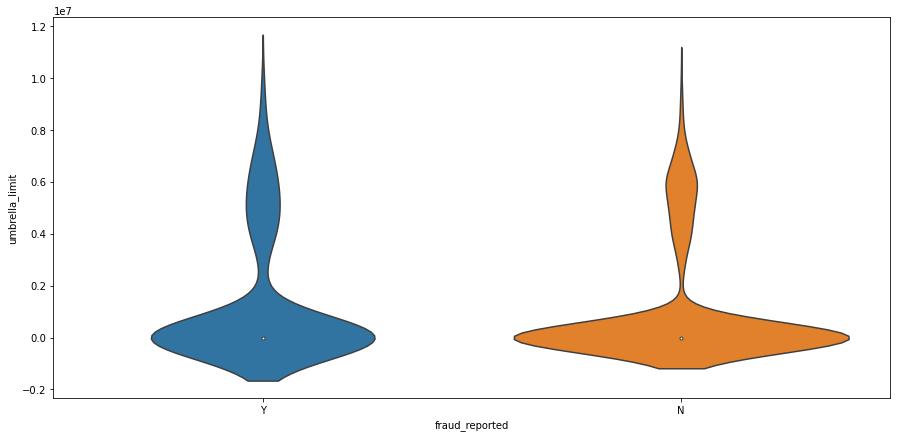

In [54]:
plt.figure(figsize=(15,7))
sns.violinplot(x='fraud_reported',y='umbrella_limit',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='umbrella_limit'>

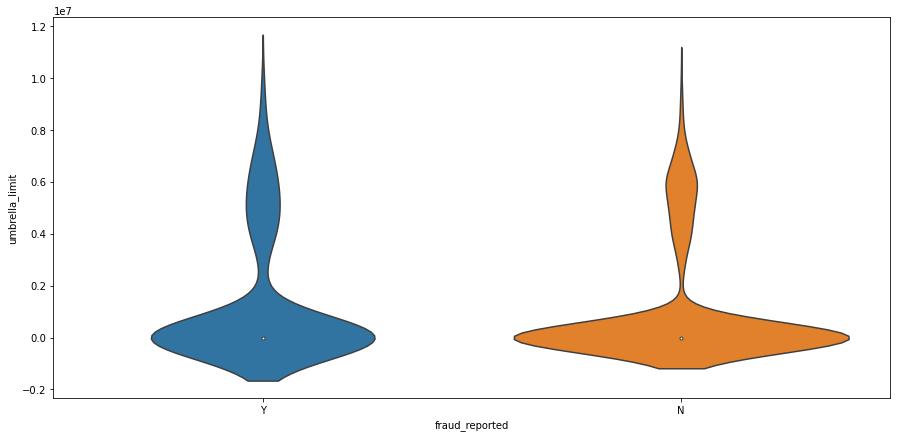

In [55]:
plt.figure(figsize=(15,7))
sns.violinplot(x='fraud_reported',y='umbrella_limit',data=df)

most of cx have the umberalla limit is zero and fraud report is also high

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

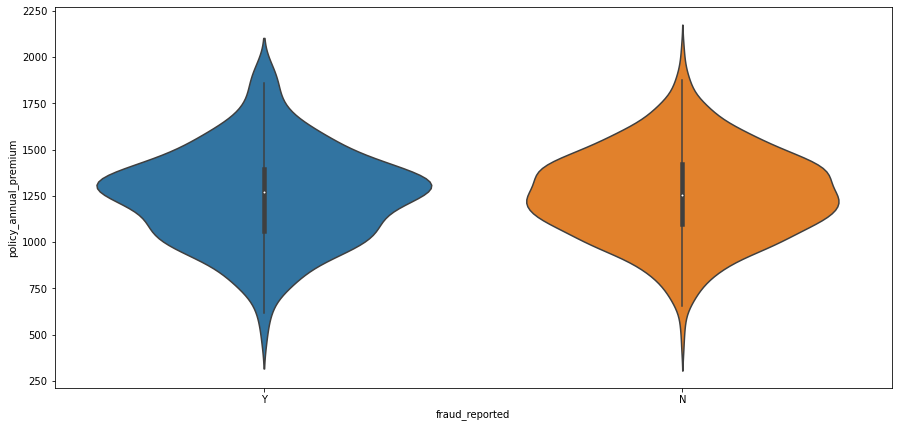

In [56]:
plt.figure(figsize=(15,7))
sns.violinplot(x='fraud_reported',y='policy_annual_premium',data=df)

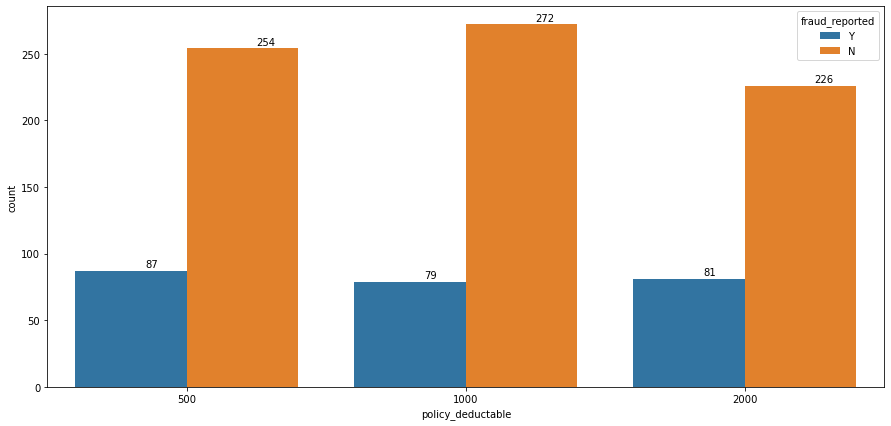

In [57]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x='policy_deductable',hue='fraud_reported',data=df)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

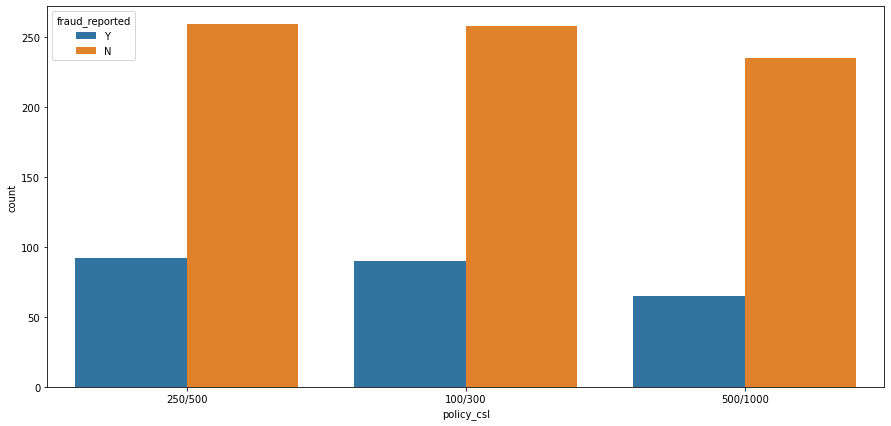

In [58]:
plt.figure(figsize=(15,7))
sns.countplot(x='policy_csl',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='policy_state', ylabel='count'>

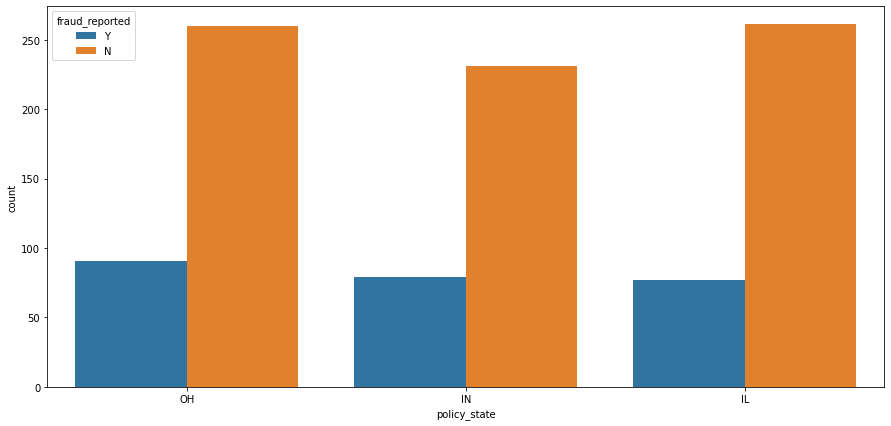

In [59]:
plt.figure(figsize=(15,7))
sns.countplot(x='policy_state',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='age', ylabel='count'>

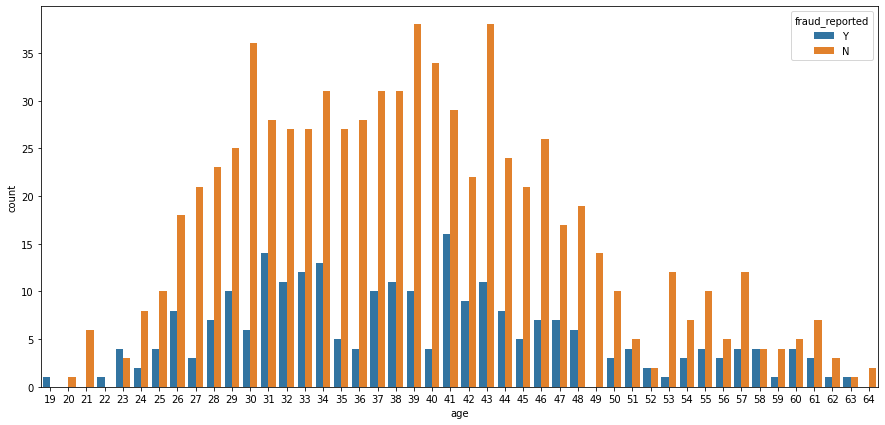

In [60]:
plt.figure(figsize=(15,7))
sns.countplot(x='age',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

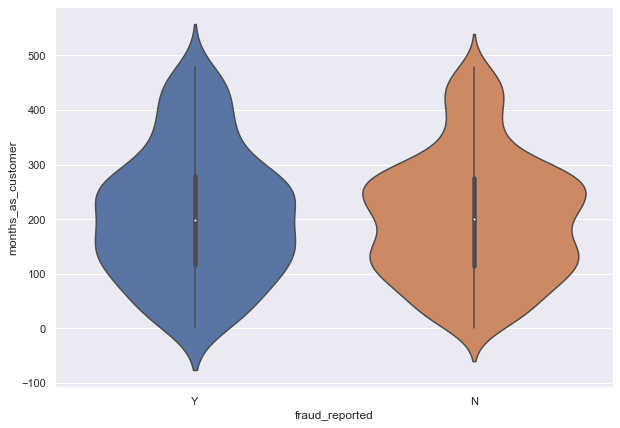

In [61]:
plt.figure(figsize=(10,7))
sns. set(color_codes=True)
sns.violinplot(y='months_as_customer',x='fraud_reported',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '2014'),
  Text(1, 0, '2006'),
  Text(2, 0, '1990'),
  Text(3, 0, '2011'),
  Text(4, 0, '2002'),
  Text(5, 0, '1999'),
  Text(6, 0, '1997'),
  Text(7, 0, '2012'),
  Text(8, 0, '1998'),
  Text(9, 0, '1992'),
  Text(10, 0, '2004'),
  Text(11, 0, '2005'),
  Text(12, 0, '1994'),
  Text(13, 0, '2000'),
  Text(14, 0, '2008'),
  Text(15, 0, '1991'),
  Text(16, 0, '2003'),
  Text(17, 0, '1995'),
  Text(18, 0, '1993'),
  Text(19, 0, '2007'),
  Text(20, 0, '2010'),
  Text(21, 0, '2013'),
  Text(22, 0, '1996'),
  Text(23, 0, '2009'),
  Text(24, 0, '2001'),
  Text(25, 0, '2015')])

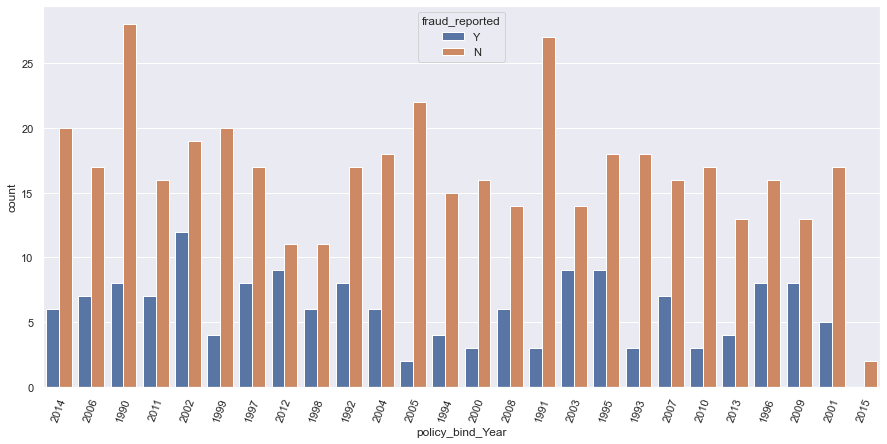

In [62]:
plt.figure(figsize=(15,7))
sns.countplot(x='policy_bind_Year',hue='fraud_reported',data=df)
plt.xticks(rotation =70,)

we observed that the fraud report is high in policy_vind_Year of 2014, 2006, 1990, 1997, 2002, 1999, 2012, 1998, 1994, 2008, 2003 and etc than others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

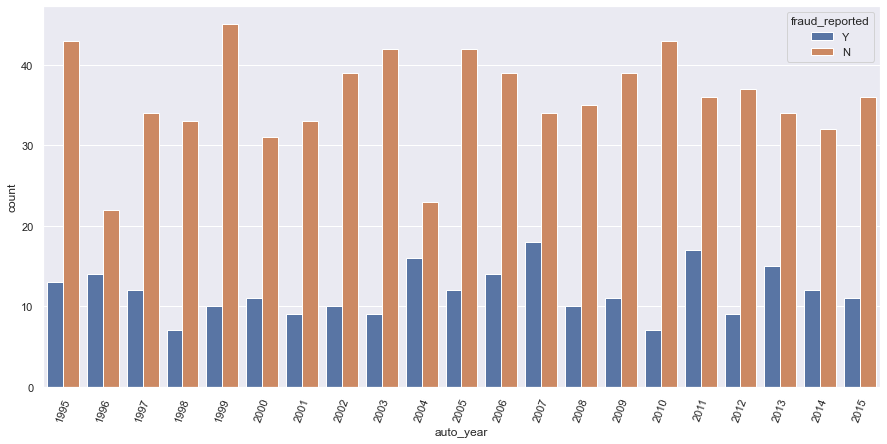

In [63]:
plt.figure(figsize=(15,7))
sns.countplot(x='auto_year',hue='fraud_reported',data=df)
plt.xticks(rotation =70,)

Observations:From the plot We notice  that we have less vehicle from 1998 and 20010 auto year and according to vehicle count fraud reported is higher in vehicle of 1996, 2004, 2007, 2011, 2013, 2014 and etc auto year than others.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

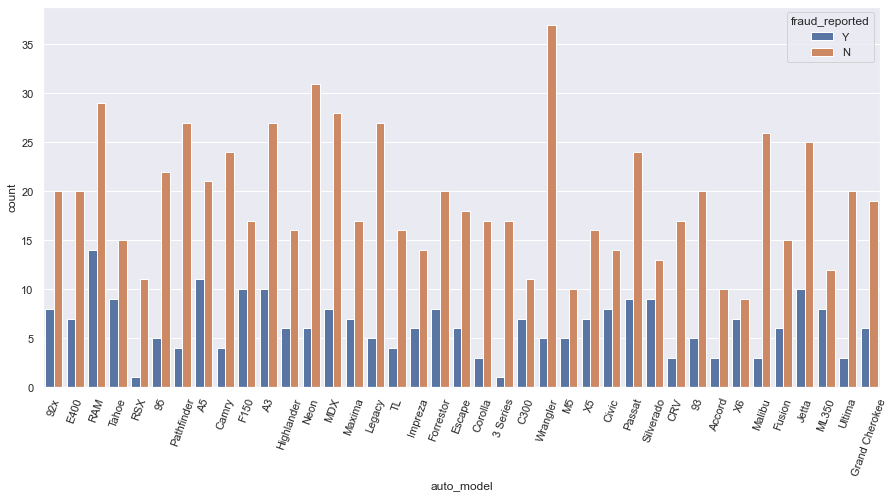

In [64]:
plt.figure(figsize=(15,7))
sns.countplot(x='auto_model',hue='fraud_reported',data=df)
plt.xticks(rotation =70,)

<AxesSubplot:xlabel='auto_make', ylabel='count'>

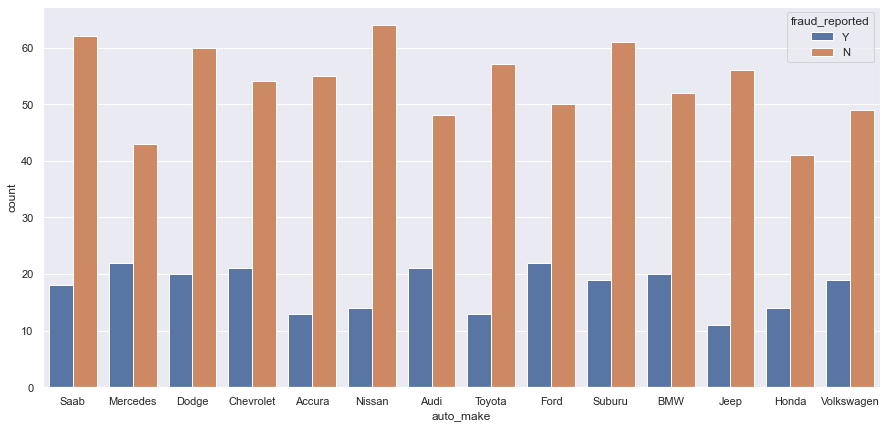

In [65]:
plt.figure(figsize=(15,7))
sns.countplot(x='auto_make',hue='fraud_reported',data=df)

# Skewness Handling

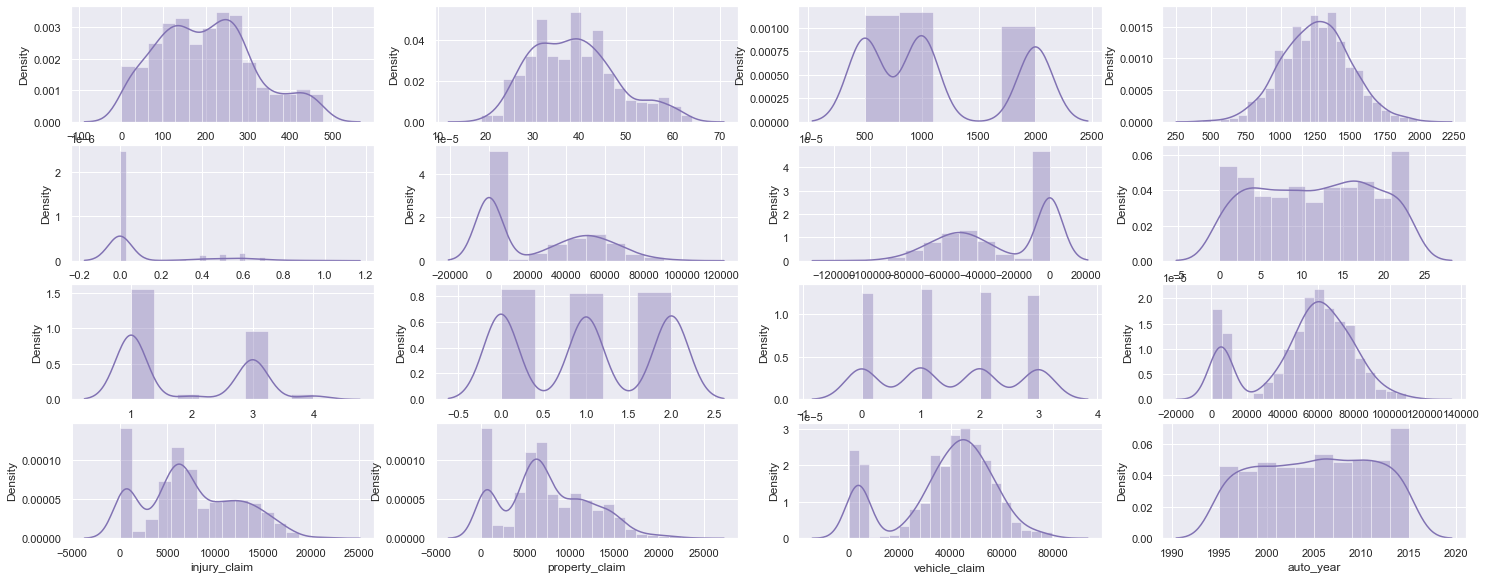

In [66]:
# ploting for numerical columns only
plt.figure(figsize=(25,20))
for i in enumerate(df.select_dtypes(include=['int64','float','int32'])):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='m')

In [67]:
df.select_dtypes(include=['int64','float','int32']).skew()

months_as_customer             0.364014
age                            0.479796
policy_deductable              0.476426
policy_annual_premium          0.005374
umbrella_limit                 1.806100
capital-gains                  0.477220
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034990
number_of_vehicles_involved    0.501009
bodily_injuries                0.012940
witnesses                      0.018399
total_claim_amount            -0.595646
injury_claim                   0.265382
property_claim                 0.378121
vehicle_claim                 -0.622627
auto_year                     -0.049502
dtype: float64

In [68]:
from sklearn.preprocessing import power_transform

df[['umbrella_limit','total_claim_amount','vehicle_calim']]=power_transform(
     df[['umbrella_limit','total_claim_amount','vehicle_claim']],method='yeo-johnson')

Handling outliers

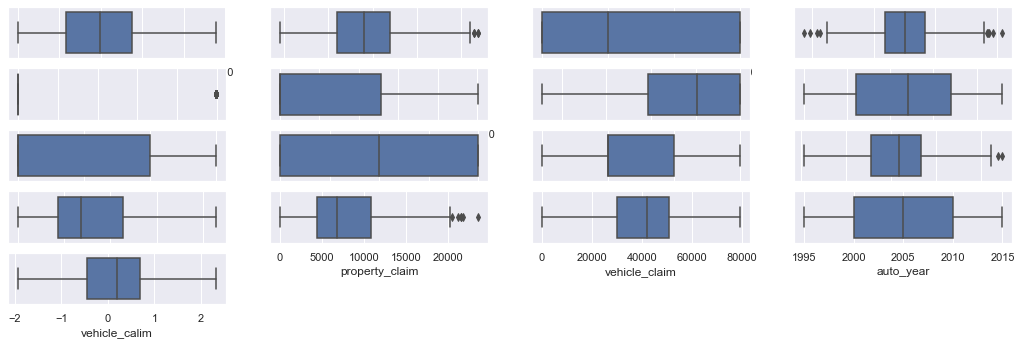

In [69]:
plt.figure(figsize=(18,10))
for i in enumerate(df.select_dtypes(include=['int64','float','int32'])):
    plt.subplot(9,4,i[0]+1)
    sns.boxplot(df[i[1]])

# ZSCORE METHOD

In [70]:
from scipy.stats import zscore

z=np.abs(zscore(df.select_dtypes(include=['int64','float','int32'])))

print(np.where(z>3))

(array([229, 248, 499, 762, 806], dtype=int64), array([ 3,  3, 13,  3,  6], dtype=int64))


In [71]:
df_1=df[(z<3).all(axis=1)]
print(("with outliers::",df.shape))
print("After removing outliers::",df_1.shape)

('with outliers::', (999, 41))
After removing outliers:: (994, 41)


In [72]:
# checking the data loss after removing outliers
data_loss = (999-994)/999*100
data_loss

0.5005005005005005

# IQR method

In [73]:
from scipy import stats
iqr = stats.iqr(df.select_dtypes(include=['int64','float','int32']))
iqr

1997.574235635032

In [75]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

df_out = df.select_dtypes(include=['int64','float','int32'])[~((df.select_dtypes(include=['int64','float','int32']) < (Q1 - 1.5 * iqr)) |(df.select_dtypes(include=['int64','float','int32']) > (Q3 + 1.5 * iqr))).any(axis=1)]
print(df_out.shape)   

(311, 17)


In [76]:
# checking the data loss after removing outliers
data_loss = (999-311)/999*100
data_loss

68.86886886886887

Due to huge dataloss I am choosinfg the ZSCORE method

In [77]:
df=df_1

# LABEL ENCODING

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           994 non-null    int64  
 1   age                          994 non-null    int64  
 2   policy_state                 994 non-null    object 
 3   policy_csl                   994 non-null    object 
 4   policy_deductable            994 non-null    int64  
 5   policy_annual_premium        994 non-null    float64
 6   umbrella_limit               994 non-null    float64
 7   insured_sex                  994 non-null    object 
 8   insured_education_level      994 non-null    object 
 9   insured_occupation           994 non-null    object 
 10  insured_hobbies              994 non-null    object 
 11  insured_relationship         994 non-null    object 
 12  capital-gains                994 non-null    int64  
 13  capital-loss        

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
# encoding  object columns into Numeric values in df
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categ_data = df.select_dtypes(exclude=['int64','float','int32'])
for val in categ_data:
    df[val]=le.fit_transform(df[val].astype(str))

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           994 non-null    int64  
 1   age                          994 non-null    int64  
 2   policy_state                 994 non-null    int32  
 3   policy_csl                   994 non-null    int32  
 4   policy_deductable            994 non-null    int64  
 5   policy_annual_premium        994 non-null    float64
 6   umbrella_limit               994 non-null    float64
 7   insured_sex                  994 non-null    int32  
 8   insured_education_level      994 non-null    int32  
 9   insured_occupation           994 non-null    int32  
 10  insured_hobbies              994 non-null    int32  
 11  insured_relationship         994 non-null    int32  
 12  capital-gains                994 non-null    int64  
 13  capital-loss        

# Dividing the data into X and Y

In [82]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [85]:
x.shape

(994, 40)

In [86]:
y.shape

(994,)

Scaling X values

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [90]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
dtype: int64

In [91]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,...,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.426698,0.443975,0.507042,0.474849,0.424883,0.502476,0.201896,0.463783,0.494634,0.512692,...,0.475653,0.504179,0.508790,0.505785,0.475949,0.546781,0.432141,0.688799,0.671916,0.452576
std,0.240313,0.203319,0.415523,0.402499,0.408046,0.168078,0.401223,0.498938,0.324961,0.309271,...,0.237333,0.310061,0.293301,0.300326,0.263783,0.423474,0.205835,0.341170,0.350900,0.235036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242171,0.288889,0.000000,0.000000,0.000000,0.385783,0.000000,0.000000,0.166667,0.230769,...,0.379765,0.230769,0.263158,0.250000,0.279070,0.000000,0.314496,0.416667,0.384615,0.349015
50%,0.417537,0.422222,0.500000,0.500000,0.333333,0.502305,0.000000,0.000000,0.500000,0.538462,...,0.528494,0.538462,0.526316,0.500000,0.465116,0.500000,0.400491,0.833333,0.807692,0.499869
75%,0.577766,0.572222,1.000000,1.000000,1.000000,0.613049,0.000000,1.000000,0.833333,0.769231,...,0.637564,0.769231,0.763158,0.750000,0.674419,1.000000,0.503686,1.000000,1.000000,0.612979
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


IMBALANCED LEARN

oversampling Boarderline SMOTE

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

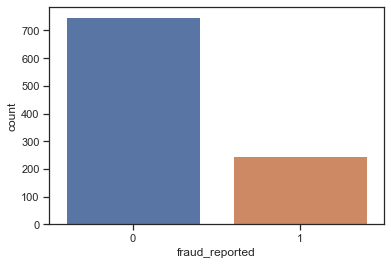

In [98]:
sns.set_style("ticks")
sns.countplot(x='fraud_reported',data=df)

In [99]:
#imporing necessary library
from imblearn.over_sampling import BorderlineSMOTE

In [100]:
x_rus, y_rus = BorderlineSMOTE().fit_resample(x,y)
print('Original Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

Original Target dataset shape: (994,)
Resample Target dataset shape (1496,)


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

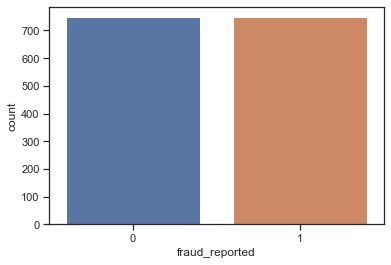

In [101]:
sns.set_style("ticks")
sns.countplot(y_rus)

# Splitting Train Data

In [102]:
#importing necessary libraries
from sklearn.model_selection import train_test_split

In [103]:
x_train,x_test,y_train,y_test = train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [104]:
x_train.shape

(1092, 40)

In [105]:
y_train.shape

(1092,)

In [106]:
x_test.shape

(404, 40)

In [107]:
y_test.shape

(404,)

# MODEL BUILDING

In [109]:
#IMPORTING NECESSARY LIBRARIES
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

# LOGISTIC REGRESSION

In [110]:
logreg = LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("Cross validation score for logreg:",np.mean(logreg_score))

Cross validation score for logreg: 0.7540245261984392


In [111]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

In [112]:
print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))

0.7351485148514851
[[134  52]
 [ 55 163]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       186
           1       0.76      0.75      0.75       218

    accuracy                           0.74       404
   macro avg       0.73      0.73      0.73       404
weighted avg       0.74      0.74      0.74       404



In [113]:
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

Training accuracy:: 0.7884615384615384
Test accuracy:: 0.7351485148514851


# KNNEIGHBOURS CLASSIFIER

In [115]:
knn = KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("Cross validation score for knn :",np.mean(knn_score))

Cross validation score for knn : 0.659128205128205


In [118]:
# knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)

print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))

0.6782178217821783
[[ 63 123]
 [  7 211]]
              precision    recall  f1-score   support

           0       0.90      0.34      0.49       186
           1       0.63      0.97      0.76       218

    accuracy                           0.68       404
   macro avg       0.77      0.65      0.63       404
weighted avg       0.76      0.68      0.64       404



In [119]:
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

Training accuracy:: 0.7554945054945055
Test accuracy:: 0.6782178217821783


# DECISION TREE CLASSIFIER

In [120]:
dtc = DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("Cross validation score for dtc:",np.mean(dtc_score))

Cross validation score for dtc: 0.8389676700111481


In [121]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)

print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))

0.8465346534653465
[[147  39]
 [ 23 195]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       186
           1       0.83      0.89      0.86       218

    accuracy                           0.85       404
   macro avg       0.85      0.84      0.84       404
weighted avg       0.85      0.85      0.85       404



In [122]:
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

Training accuracy:: 1.0
Test accuracy:: 0.8465346534653465


# RANDOM FOREST CLASSIFIER

In [123]:
rfc = RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("Cross validation score for rfc :",np.mean(rfc_score))

Cross validation score for rfc : 0.8724147157190636


In [124]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)

print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))

0.8564356435643564
[[159  27]
 [ 31 187]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       186
           1       0.87      0.86      0.87       218

    accuracy                           0.86       404
   macro avg       0.86      0.86      0.86       404
weighted avg       0.86      0.86      0.86       404



In [125]:
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

Training accuracy:: 1.0
Test accuracy:: 0.8564356435643564


# ADABOOST CLASSIFIER

In [126]:
adb = AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=5,scoring='accuracy')
print("Cross validation score for adb :",np.mean(adb_score))

Cross validation score for adb : 0.8389899665551839


In [127]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)

print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))

0.8514851485148515
[[160  26]
 [ 34 184]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       186
           1       0.88      0.84      0.86       218

    accuracy                           0.85       404
   macro avg       0.85      0.85      0.85       404
weighted avg       0.85      0.85      0.85       404



In [128]:
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

Training accuracy:: 0.8974358974358975
Test accuracy:: 0.8514851485148515


# BAGGING CLASSIFIER

In [129]:
bgc = BaggingClassifier()
bgc_score=cross_val_score(bgc,x_rus,y_rus,cv=5,scoring='accuracy')
print("Cross validation score for bgc :",np.mean(bgc_score))

Cross validation score for bgc : 0.8703835005574134


In [130]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)

print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))

0.8415841584158416
[[155  31]
 [ 33 185]]
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       186
           1       0.86      0.85      0.85       218

    accuracy                           0.84       404
   macro avg       0.84      0.84      0.84       404
weighted avg       0.84      0.84      0.84       404



In [131]:
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

Training accuracy:: 0.9917582417582418
Test accuracy:: 0.8415841584158416


# GRADIENT BOOST CLASSIFIER

In [132]:
grbc = GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=5,scoring='accuracy')
print("Cross validation score for grbc :",np.mean(grbc_score))

Cross validation score for grbc : 0.8757569676700111


In [133]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)

print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))

0.8910891089108911
[[158  28]
 [ 16 202]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       186
           1       0.88      0.93      0.90       218

    accuracy                           0.89       404
   macro avg       0.89      0.89      0.89       404
weighted avg       0.89      0.89      0.89       404



In [134]:
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

Training accuracy:: 0.9761904761904762
Test accuracy:: 0.8910891089108911


From above classifiers we are choosing GRADIENT BOOSTING CLASSIFIER as a final model for hyper parameter tuning process based on train and test accuracies

# Hyper parameter tuning

In [136]:
GBC=GradientBoostingClassifier()
param_grid={
    'criterion' :['mse','mae'],
    'n_estimators' :[100,200],
    'learning_rate' :[0.1,0.5,1.0],
     'random_state' :[5],
}

In [137]:
GBC_grid=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=1)

In [138]:
GBC_grid.fit(x_train,y_train)
GBC_pred=GBC_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,GBC_pred))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Accuracy after parameter tuning:: 0.8960396039603961


In [139]:
GBC_grid.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'n_estimators': 200,
 'random_state': 5}

# MODEL TRAINING

In [140]:
best_param={
    'criterion' :['mse'],
    'n_estimators' :[200],
    'learning_rate' :[0.1],
     'random_state' :[5],
}

In [141]:
best_gbc_grid=GridSearchCV(GradientBoostingClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)
best_gbc_grid.fit(x_train,y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['mse'], 'learning_rate': [0.1],
                         'n_estimators': [200], 'random_state': [5]},
             scoring='accuracy', verbose=2)

In [142]:
best_gbc_pred=best_gbc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_gbc_pred))

Accuracy after parameter tuning:: 0.8960396039603961


In [144]:
print("Classification Report::\n",classification_report(y_test,best_gbc_pred))

Classification Report::
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       186
           1       0.88      0.93      0.91       218

    accuracy                           0.90       404
   macro avg       0.90      0.89      0.89       404
weighted avg       0.90      0.90      0.90       404



<AxesSubplot:>

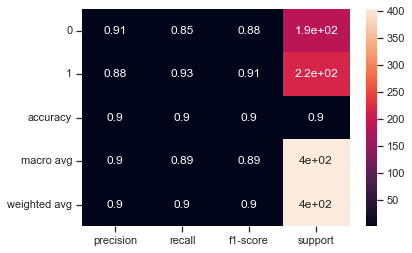

In [145]:
clsf_repo = classification_report(y_test,best_gbc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)


# Plotting AUC ROC curve

In [146]:
from sklearn.metrics import roc_auc_score

In [147]:
print("roc auc score::",roc_auc_score(y_test,best_gbc_pred))

roc auc score:: 0.893015685113939


In [148]:
from sklearn.metrics import roc_curve

In [150]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_gbc_pred, pos_label=1)

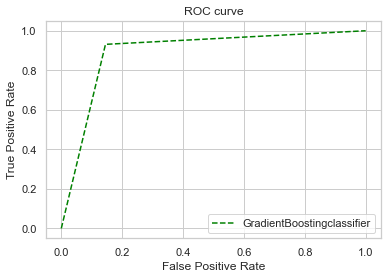

In [154]:
# plotting ROC CURVE
sns.set_theme(style="whitegrid")
plt.plot(fpr1, tpr1,linestyle='--',color='green', label='GradientBoostingclassifier')
plt.title("ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

# Saving the best model

In [155]:
import joblib
joblib.dump(best_gbc_grid.best_estimator_,'InsuranceClaims-FraudDetection.obj')

['InsuranceClaims-FraudDetection.obj']

# prediction

In [156]:
# loading the saved model
model=joblib.load("InsuranceClaims-FraudDetection.obj")

# Prediction
prediction = model.predict(x_test)
prediction

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [157]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,0,0
4,0,1
...,...,...
399,0,0
400,1,1
401,1,1
402,0,0


Thats is it we get the actual and predicted values are almost same, so our predicted model will well suited for the best values.